#Q1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
stock_pred = pd.read_csv('stock_prediction_data.csv')
stock_price = pd.read_csv('stock_price.csv')

# Check for missing values and basic statistics
print(stock_pred.info())
print(stock_price.info())

# Drop rows with missing values (if applicable)
stock_pred.dropna(inplace=True)
stock_price.dropna(inplace=True)

# Normalize the data (since regression benefits from normalized features)
scaler = StandardScaler()
X = stock_pred.iloc[:, :-1]  # all columns except the last one as features
y = stock_pred.iloc[:, -1]   # the last column as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5.23    299 non-null    float64
 1   1.32    299 non-null    float64
 2   2.85    299 non-null    float64
 3   1.99    299 non-null    float64
 4   9.49    299 non-null    float64
 5   2.92    299 non-null    float64
 6   8.09    299 non-null    float64
 7   7.77    299 non-null    float64
 8   1.15    299 non-null    float64
 9   1.49    299 non-null    float64
dtypes: float64(10)
memory usage: 23.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -0.31   299 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_sklearn = lr.predict(X_test_scaled)

# Calculate the total error (MSE)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Sklearn Linear Regression MSE:", mse_sklearn)


Sklearn Linear Regression MSE: 7.989978242488047


In [ ]:
import numpy as np

# Function to compute gradient descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        gradient = (1/m) * (X.T @ (X @ theta - y))
        theta -= learning_rate * gradient
    return theta

# Add a bias term (intercept) to the data
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Train the model using gradient descent
theta_gd = gradient_descent(X_train_bias, y_train)

# Predict the test set
y_pred_gd = X_test_bias @ theta_gd

# Calculate the total error (MSE)
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Gradient Descent Linear Regression MSE:", mse_gd)


Gradient Descent Linear Regression MSE: 7.990130165392903


In [ ]:
# Function to compute the closed-form solution (Normal Equation)
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Train the model using the normal equation
theta_ne = normal_equation(X_train_bias, y_train)

# Predict the test set
y_pred_ne = X_test_bias @ theta_ne

# Calculate the total error (MSE)
mse_ne = mean_squared_error(y_test, y_pred_ne)
print("Closed-Form Solution MSE:", mse_ne)


Closed-Form Solution MSE: 7.989978242488048


In [ ]:
# Print predicted values and true values for sanity check
print("Sklearn Predictions vs True Labels:")
for pred, true in zip(y_pred_sklearn, y_test):
    print(f"Predicted: {pred}, True: {true}")

print("Gradient Descent Predictions vs True Labels:")
for pred, true in zip(y_pred_gd, y_test):
    print(f"Predicted: {pred}, True: {true}")

print("Closed-Form Solution Predictions vs True Labels:")
for pred, true in zip(y_pred_ne, y_test):
    print(f"Predicted: {pred}, True: {true}")


Sklearn Predictions vs True Labels:
Predicted: 4.808980349811147, True: 4.59
Predicted: 4.570899506157062, True: 7.13
Predicted: 4.119462875704087, True: 0.9
Predicted: 5.341275788617486, True: 9.51
Predicted: 5.544125470961001, True: 4.02
Predicted: 5.132433710267991, True: 7.61
Predicted: 5.789646184813622, True: 8.81
Predicted: 5.730993538385987, True: 4.05
Predicted: 4.3421629617697945, True: 1.77
Predicted: 4.755732632902966, True: 8.42
Predicted: 4.1648867340179905, True: 7.97
Predicted: 4.483069319990945, True: 2.56
Predicted: 5.695524619201414, True: 7.69
Predicted: 5.432327624586744, True: 6.1
Predicted: 4.964118512993976, True: 9.13
Predicted: 4.22737621220193, True: 2.06
Predicted: 5.384675782934896, True: 6.92
Predicted: 4.84344324252486, True: 6.42
Predicted: 6.367438031084793, True: 4.03
Predicted: 5.291939302588681, True: 1.58
Predicted: 5.701453619334326, True: 4.21
Predicted: 5.223130031452133, True: 7.45
Predicted: 5.159451710363914, True: 8.15
Predicted: 5.3780314951

#Q2

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Transform the features to 2nd order polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 3: Train the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Step 4: Make predictions on the test set
y_pred_poly = poly_reg.predict(X_test_poly)

# Step 5: Evaluate the model performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression (2nd order) MSE: {mse_poly}")

# Display some predictions vs true values
for pred, true in zip(y_pred_poly[:10], y_test[:10]):
    print(f"Predicted: {pred}, True: {true}")


Polynomial Regression (2nd order) MSE: 10.466926458889027
Predicted: 4.639895082204987, True: 4.59
Predicted: 7.53758159794482, True: 7.13
Predicted: 4.830739834570935, True: 0.9
Predicted: 6.11923840268463, True: 9.51
Predicted: 9.090257136496797, True: 4.02
Predicted: 7.7864085426153515, True: 7.61
Predicted: 5.636460136251398, True: 8.81
Predicted: 2.418596690783852, True: 4.05
Predicted: 3.429280287580918, True: 1.77
Predicted: 3.3245259111057415, True: 8.42


#Q3

In [ ]:
import numpy as np

# Given data
X = np.array([[0, 1],   # x=0, intercept=1
              [1, 1],   # x=1, intercept=1
              [2, 1],   # x=2, intercept=1
              [3, 1]])  # x=3, intercept=1
y = np.array([1, 0, 2, -2])  # Corresponding y values

# Closed-form solution: theta = (X.T X)^(-1) X.T y
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Extract the slope (a) and intercept (b)
a, b = theta
print(f"a = {a}, b = {b}")


a = -0.7, b = 1.2999999999999998


#Q4


In [ ]:
import numpy as np
import pandas as pd

# Original data
data = np.array([[0, 2],
                 [2, -1],
                 [-2, 1],
                 [3, 3],
                 [4, 1]])

# Feature map transformation
phi_1 = data[:, 0]
phi_2 = data[:, 1]
phi_3 = data[:, 0] * (data[:, 1]**2)
phi_4 = data[:, 0]**3
phi_5 = data[:, 1]**2
phi_6 = np.ones(data.shape[0])

# Combine into a single transformed dataset
transformed_data = np.column_stack([phi_1, phi_2, phi_3, phi_4, phi_5, phi_6])

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(transformed_data, columns=['phi_1(x)', 'phi_2(x)', 'phi_3(x)', 'phi_4(x)', 'phi_5(x)', 'phi_6(x)'])
print(df)


   phi_1(x)  phi_2(x)  phi_3(x)  phi_4(x)  phi_5(x)  phi_6(x)
0       0.0       2.0       0.0       0.0       4.0       1.0
1       2.0      -1.0       2.0       8.0       1.0       1.0
2      -2.0       1.0      -2.0      -8.0       1.0       1.0
3       3.0       3.0      27.0      27.0       9.0       1.0
4       4.0       1.0       4.0      64.0       1.0       1.0


#Q5

In [ ]:
import numpy as np

# Probability table (as a 2D numpy array)
probabilities = np.array([
    [0.4, 0.1],  # y = ex
    [0.2, 0.1],  # y = food
    [0.0, 0.1],  # y = travel
    [0.1, 0.1]   # y = weather
])

# Define the events
topics = ["ex", "food", "travel", "weather"]
dates = ["good", "bad"]

# Total probabilities for good and bad dates
P_good = np.sum(probabilities[:, 0])
P_bad = np.sum(probabilities[:, 1])

# Probability of talking about food and having a good date
P_food_and_good = probabilities[1, 0]

# Probability of talking about food or travel
P_food = np.sum(probabilities[1, :])
P_travel = np.sum(probabilities[2, :])
P_food_or_travel = P_food + P_travel - probabilities[1, 1]  # Since we don't double count

# Probability of talking about travel or having a good date
P_travel_or_good = P_travel + P_good - probabilities[2, 0]

# Probability of having a bad date given you talk about your ex
P_ex_and_bad = probabilities[0, 1]
P_ex = np.sum(probabilities[0, :])  # Total probability of talking about ex
P_bad_given_ex = P_ex_and_bad / P_ex

# Probability of having a good date given that you talk about the weather
P_weather_and_good = probabilities[3, 0]
P_weather = np.sum(probabilities[3, :])  # Total probability of talking about weather
P_good_given_weather = P_weather_and_good / P_weather

# Output the results
print("1. Probability of having a good date (P(X = good)): {:.2f}".format(P_good))
print("   Probability of having a bad date (P(X = bad)): {:.2f}".format(P_bad))
print("2. Probability of talking about food and having a good date (P(Y = food, X = good)): {:.2f}".format(P_food_and_good))
print("3. Probability of talking about food or travel (P(Y = food ∪ Y = travel)): {:.2f}".format(P_food_or_travel))
print("4. Probability of talking about travel or having a good date (P(Y = travel ∪ X = good)): {:.2f}".format(P_travel_or_good))
print("5. Probability of having a bad date given you talk about your ex (P(X = bad | Y = ex)): {:.2f}".format(P_bad_given_ex))
print("6. Probability of having a good date given that you talk about the weather (P(X = good | Y = weather)): {:.2f}".format(P_good_given_weather))

# Which topic should you talk about? (Assuming maximum probability)
best_topic_index = np.argmax(probabilities[:, 0])  # Looking for max P(X = good)
print("7. Recommended Topic to talk about: {}".format(topics[best_topic_index]))


1. Probability of having a good date (P(X = good)): 0.70
   Probability of having a bad date (P(X = bad)): 0.40
2. Probability of talking about food and having a good date (P(Y = food, X = good)): 0.20
3. Probability of talking about food or travel (P(Y = food ∪ Y = travel)): 0.30
4. Probability of talking about travel or having a good date (P(Y = travel ∪ X = good)): 0.80
5. Probability of having a bad date given you talk about your ex (P(X = bad | Y = ex)): 0.20
6. Probability of having a good date given that you talk about the weather (P(X = good | Y = weather)): 0.50
7. Recommended Topic to talk about: ex


#Q6

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
sat_data = pd.read_csv('SAT.csv' ,  header=None)
lunch_wait_time_data = pd.read_csv('lunch_wait_time.csv',  header=None)
student_age_data = pd.read_csv('student_age.csv',  header=None)

sat_data.head()


,0
0,1151
1,1107
2,1268
3,831
4,1439


In [8]:
lunch_wait_time_data.head()


,0.24
0,0.33
1,0.78
2,2.39
3,0.72
4,0.46


In [9]:
student_age_data.head()

,22.6
0,19.1
1,22.4
2,22.3
3,18.3
4,18.8


Text(0, 0.5, 'Frequency')

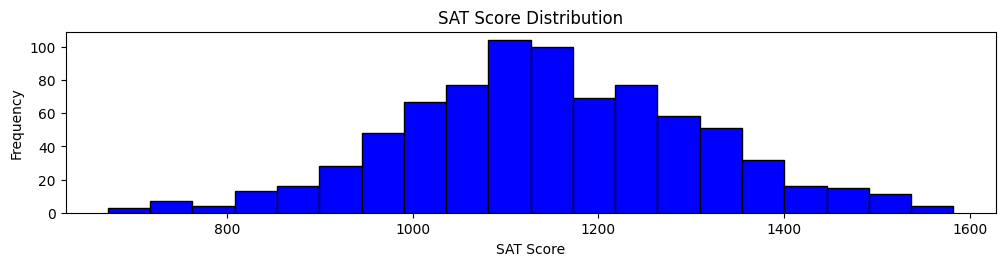

In [15]:
# Generate histograms for each dataset
plt.figure(figsize=(12, 8))

# SAT Scores
plt.subplot(3, 1, 1)
plt.hist(sat_data[0], bins=20, color='blue', edgecolor='black')
plt.title('SAT Score Distribution')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

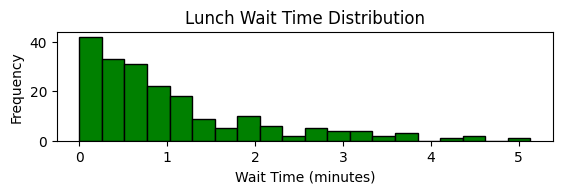

In [16]:
# Lunch Wait Time
plt.subplot(3, 1, 2)
plt.hist(lunch_wait_time_data[0], bins=20, color='green', edgecolor='black')
plt.title('Lunch Wait Time Distribution')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')

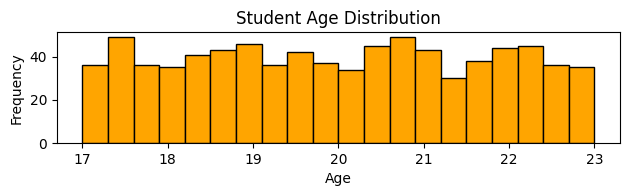

In [17]:
# Student Age
plt.subplot(3, 1, 3)
plt.hist(student_age_data[0], bins=20, color='orange', edgecolor='black')
plt.title('Student Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
# Calculate average values for each dataset
sat_avg = sat_data[0].mean()
lunch_wait_time_avg = lunch_wait_time_data[0].mean()
student_age_avg = student_age_data[0].mean()

print(f"Average SAT Score: {sat_avg}")
print(f"Average Lunch Wait Time: {lunch_wait_time_avg} minutes")
print(f"Average Student Age: {student_age_avg}")


Average SAT Score: 1147.82875
Average Lunch Wait Time: 1.0405 minutes
Average Student Age: 19.931625


In [19]:
# Probability of SAT score greater than 1200
sat_prob = np.mean(sat_data[0] > 1200)
print(f"Probability of scoring higher than 1200 on SAT: {sat_prob:.4f}")

# Probability of waiting more than 5 minutes
wait_prob = np.mean(lunch_wait_time_data[0] > 5)
print(f"Probability of waiting more than 5 minutes: {wait_prob:.4f}")

# Probability of being younger than 19
age_prob = np.mean(student_age_data[0] < 19)
print(f"Probability of being younger than 19: {age_prob:.4f}")

Probability of scoring higher than 1200 on SAT: 0.3575
Probability of waiting more than 5 minutes: 0.0050
Probability of being younger than 19: 0.3412


#Q7

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

# Define the function p(x)
def p(x):
    return x**2 - x + 1

# Define the equation to find the value of b
def equation(b):
    integral, _ = quad(p, 0, b)
    return integral - 1  # We want this to equal 0

# Use SciPy's fsolve to find the value of b
b_initial_guess = 2  # Start with an initial guess
b_value = fsolve(equation, b_initial_guess)[0]  # Take the first element
print(f"The value of b is: {b_value:.4f}")

# Calculate the probability P(0 ≤ x ≤ 0.3)
probability_0_3, _ = quad(p, 0, 0.3)
print(f"The probability P(0 ≤ x ≤ 0.3) is: {probability_0_3:.4f}")


The value of b is: 1.1537
The probability P(0 ≤ x ≤ 0.3) is: 0.2640


#Q 70 points

In [ ]:
import numpy as np

# Define basis vectors and target point
a = np.array([7, 1])
b = np.array([0, 1])
y = np.array([1, 8])

# Question 1: Identify if the target y is within the span of the provided basis vectors.
def is_within_span(a, b, y):
    # Set up the system of equations
    A = np.vstack((a, b)).T  # Stack vectors a and b horizontally to form matrix A
    try:
        # Solve for scalars alpha and beta
        coeffs = np.linalg.solve(A, y)
        return True, coeffs
    except np.linalg.LinAlgError:
        return False, None

# Question 2: Calculate the normalized version of the basis vectors
def normalize(vectors):
    return [v / np.linalg.norm(v) for v in vectors]

# Question 3: Use the original basis as the columns of a matrix A
A = np.vstack((a, b)).T

# Question 4: Use the original basis as the rows of a matrix B
B = np.vstack((a, b))

# Question 5: Identify the null space of matrix A and B
def null_space(matrix):
    u, s, vh = np.linalg.svd(matrix)
    null_space_dimension = np.sum(s < 1e-10)  # Tolerance for numerical zero
    return null_space_dimension

# Question 6: Check if columns of A are independent or dependent
def is_independent(A):
    return np.linalg.matrix_rank(A) == A.shape[1]

# Question 7: Check if columns of B are independent or dependent
def is_independent_B(B):
    return np.linalg.matrix_rank(B) == B.shape[1]

# Question 8: What is the dimension of the null space for A and B
null_space_A = null_space(A)
null_space_B = null_space(B)

# Question 9: Identify the rank of matrix A and B
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

# Question 10: Relationship between number of basis vectors, null space dimension, and rank
def rank_nullity_equation(matrix):
    num_columns = matrix.shape[1]
    nullity = null_space(matrix)
    rank = np.linalg.matrix_rank(matrix)
    return rank + nullity == num_columns

# Execute questions
is_in_span, coefficients = is_within_span(a, b, y)
normalized_basis = normalize([a, b])
span_results = (is_in_span, coefficients)
null_space_dimensions = (null_space_A, null_space_B)
independent_A = is_independent(A)
independent_B = is_independent_B(B)

# Print results
print("Question 1: Is y within the span of a and b?")
print(f"Result: {span_results[0]}, Coefficients: {span_results[1]}")

print("\nQuestion 2: Normalized basis vectors:")
print(f"Normalized a: {normalized_basis[0]}")
print(f"Normalized b: {normalized_basis[1]}")

print("\nQuestion 3: Matrix A (columns are a and b):")
print(A)

print("\nQuestion 4: Matrix B (rows are a and b):")
print(B)

print("\nQuestion 5: Null space dimensions of A and B:")
print(f"Null space dimension of A: {null_space_A}")
print(f"Null space dimension of B: {null_space_B}")

print("\nQuestion 6: Are columns of A independent?")
print(f"Result: {independent_A}")

print("\nQuestion 7: Are columns of B independent?")
print(f"Result: {independent_B}")

print("\nQuestion 8: Dimension of the null space for A and B:")
print(f"Null space dimension for A: {null_space_A}")
print(f"Null space dimension for B: {null_space_B}")

print("\nQuestion 9: Rank of matrix A and B:")
print(f"Rank of A: {rank_A}")
print(f"Rank of B: {rank_B}")

print("\nQuestion 10: Rank-Nullity Equation for A:")
print(f"Does Rank + Nullity = Number of columns hold for A? {rank_nullity_equation(A)}")
print("\nQuestion 10: Rank-Nullity Equation for B:")
print(f"Does Rank + Nullity = Number of columns hold for B? {rank_nullity_equation(B)}")


Question 1: Is y within the span of a and b?
Result: True, Coefficients: [0.14285714 7.85714286]

Question 2: Normalized basis vectors:
Normalized a: [0.98994949 0.14142136]
Normalized b: [0. 1.]

Question 3: Matrix A (columns are a and b):
[[7 0]
 [1 1]]

Question 4: Matrix B (rows are a and b):
[[7 1]
 [0 1]]

Question 5: Null space dimensions of A and B:
Null space dimension of A: 0
Null space dimension of B: 0

Question 6: Are columns of A independent?
Result: True

Question 7: Are columns of B independent?
Result: True

Question 8: Dimension of the null space for A and B:
Null space dimension for A: 0
Null space dimension for B: 0

Question 9: Rank of matrix A and B:
Rank of A: 2
Rank of B: 2

Question 10: Rank-Nullity Equation for A:
Does Rank + Nullity = Number of columns hold for A? True

Question 10: Rank-Nullity Equation for B:
Does Rank + Nullity = Number of columns hold for B? True
